In [22]:
import tensorflow as tf
if (not tf.__version__.startswith('2')): #Checking if tf 2.0 is installed
    print('Please install tensorflow 2.0 to run this notebook')
print('Tensorflow version: ',tf.__version__)

Tensorflow version:  2.12.0


In [52]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.metrics import confusion_matrix

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import optimizers

In [53]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# separate x_train in X_train and X_val, same for y_train
X_train=x_train[0:50000] / 255 #divide by 255 so that they are in range 0 to 1
Y_train=keras.utils.to_categorical(y_train[0:50000],10) # one-hot encoding

X_val=x_train[50000:60000] / 255
Y_val=keras.utils.to_categorical(y_train[50000:60000],10)

X_test=x_test / 255
Y_test=keras.utils.to_categorical(y_test,10)

del x_train, y_train, x_test, y_test

X_train=np.reshape(X_train, (X_train.shape[0],28,28,1))
X_val=np.reshape(X_val, (X_val.shape[0],28,28,1))
X_test=np.reshape(X_test, (X_test.shape[0],28,28,1))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(50000, 10)
(10000, 10)
(10000, 10)


C:\Users\simon\AppData\Local\Temp\ipykernel_38616\2511242064.py:6: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.title('true label: '+np.str(np.argmax(Y_train,axis=1)[i]))


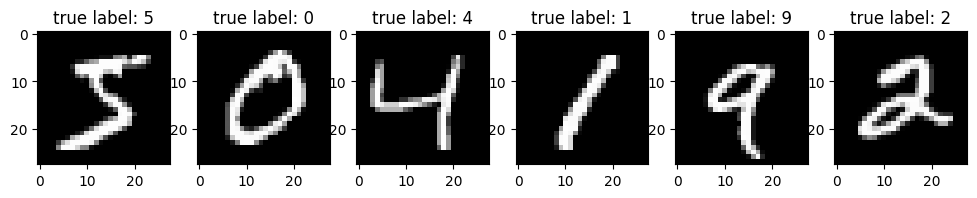

In [54]:
# visualize the 4 first mnist images before shuffling the pixels
plt.figure(figsize=(12,12))
for i in range(0,6):
    plt.subplot(1,6,(i+1))
    plt.imshow((X_train[i,:,:,0]),cmap="gray")
    plt.title('true label: '+np.str(np.argmax(Y_train,axis=1)[i]))
    #plt.axis('off')

In [41]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), input_shape=(28, 28, 1), padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, (3, 3), padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10))


In [42]:
# compile model and intitialize weights
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [43]:
# summarize model along with number of model weights
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 10)              

In [51]:
# train the model
history=model.fit(X_train, Y_train, 
                  batch_size=128, 
                  epochs=10,
                  verbose=2, 
                  validation_data=(X_val, Y_val)
                 )

Epoch 1/10
391/391 - 17s - loss: 10.6236 - accuracy: 0.1121 - val_loss: 11.1377 - val_accuracy: 0.1064 - 17s/epoch - 44ms/step
Epoch 2/10
391/391 - 15s - loss: 9.4816 - accuracy: 0.1136 - val_loss: 9.3582 - val_accuracy: 0.1064 - 15s/epoch - 38ms/step
Epoch 3/10
391/391 - 15s - loss: 9.3240 - accuracy: 0.1136 - val_loss: 9.3582 - val_accuracy: 0.1064 - 15s/epoch - 38ms/step
Epoch 4/10
391/391 - 15s - loss: 9.3240 - accuracy: 0.1136 - val_loss: 9.3582 - val_accuracy: 0.1064 - 15s/epoch - 38ms/step
Epoch 5/10
391/391 - 16s - loss: 9.3240 - accuracy: 0.1136 - val_loss: 9.3582 - val_accuracy: 0.1064 - 16s/epoch - 40ms/step
Epoch 6/10
391/391 - 16s - loss: 9.3240 - accuracy: 0.1136 - val_loss: 9.3582 - val_accuracy: 0.1064 - 16s/epoch - 41ms/step
Epoch 7/10


KeyboardInterrupt: 